<a href="https://colab.research.google.com/github/karloxkronfeld/Finanzas/blob/main/soporte_resistencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install alpha_vantage

In [2]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
from pylab import *

In [3]:
time_series=TimeSeries(key="000W9HI05KWAWA7B",output_format="pandas")
data=time_series.get_intraday("EURUSD",interval="1min",outputsize="full")
data=data[0][::-1].iloc[:,[3]]
data.columns=["close"]

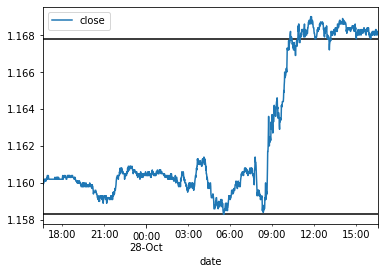

In [4]:
data.plot()
hlines(data[-150:].min(),data.index[0],data.index[-1])
hlines(data.min(),data.index[0],data.index[-1])

In [5]:
minimo=data.idxmin()
maximo=data.idxmax()

In [6]:
x1= [data.loc[maximo].index]
y1= [data.loc[maximo].values]
x2= [data.loc[minimo].index]
y2= [data.loc[minimo].values]

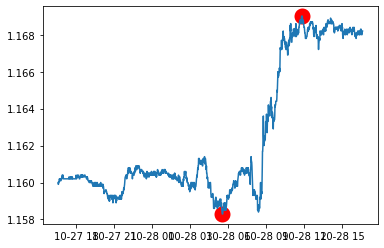

In [7]:
plot(data)
scatter(x1,y1,linewidths=10,color="red")
scatter(x2,y2,linewidths=10,color="red")



In [81]:
data

,close
date,
2021-10-27 13:36:00,1.1609
2021-10-27 13:37:00,1.1608
2021-10-27 13:38:00,1.1609
2021-10-27 13:39:00,1.1609
2021-10-27 13:40:00,1.1609
...,...
2021-10-28 13:31:00,1.1680
2021-10-28 13:32:00,1.1683
2021-10-28 13:33:00,1.1684


In [17]:
ultimas2horas=data.iloc[-120:]
ultimas4horas=data.iloc[-240:]

,close
date,
2021-10-28 14:36:00,1.1683
2021-10-28 14:37:00,1.1684
2021-10-28 14:38:00,1.1682
2021-10-28 14:39:00,1.1684
2021-10-28 14:40:00,1.1684
...,...
2021-10-28 16:31:00,1.1680
2021-10-28 16:32:00,1.1680
2021-10-28 16:33:00,1.1682


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


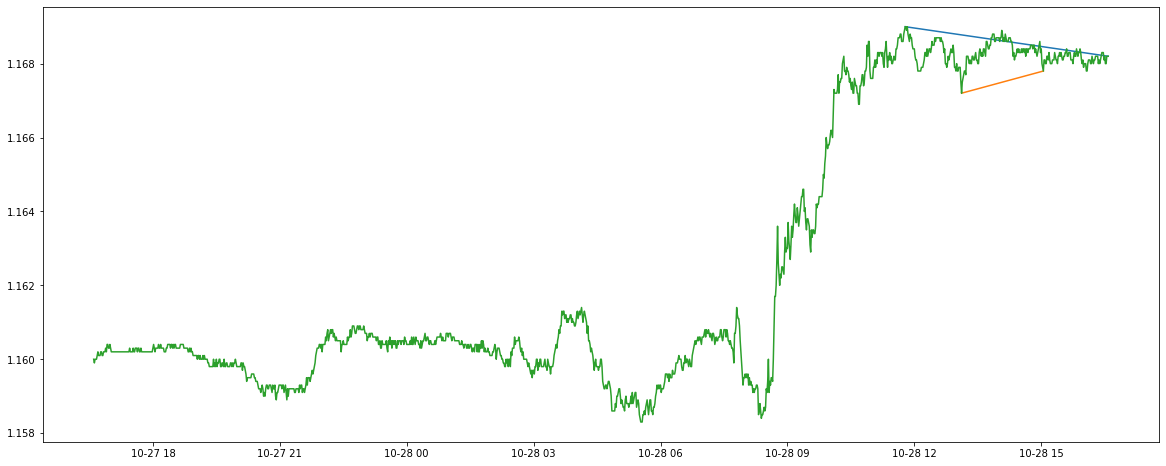

In [55]:
corde_x_min= [ultimas2horas.idxmin().close,ultimas4horas.idxmin().close]
corde_y_min= [ultimas2horas.min(),ultimas4horas.min()]
corde_x_max= [ultimas2horas.idxmax().close,ultimas4horas.idxmax().close]
corde_y_max= [ultimas2horas.max(),ultimas4horas.max()]


prueba_x_max=[ultimas2horas.close.index[-1],ultimas4horas.idxmax().close]
prueba_y_max=[ultimas2horas.close[-1],ultimas4horas.max()]

figure(figsize=(20,8))
plot(prueba_x_max,prueba_y_max)
# plot(corde_x_max,corde_y_max)
plot(corde_x_min,corde_y_min)
plot(data)